In [1]:
import numpy as np # linear algebra
import pandas as pd

In [8]:
insurance=pd.read_csv("insurance.csv")

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [10]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
insurance.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
insurance['region'].unique()
labelencoder = LabelEncoder()

In [15]:
insurance['region_encode'] = labelencoder.fit_transform(insurance['region'])
insurance['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

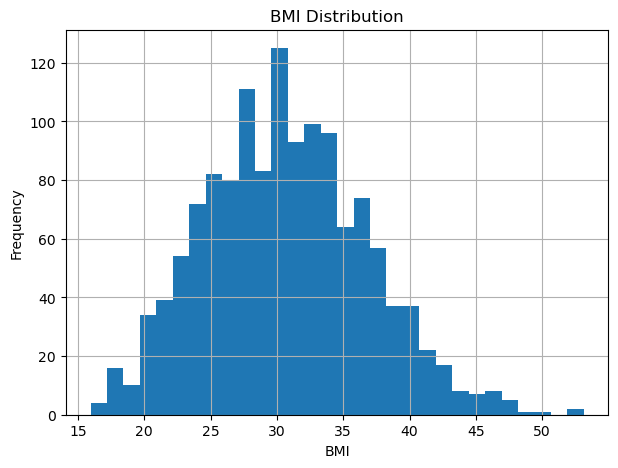

C:\Users\VEDANGI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


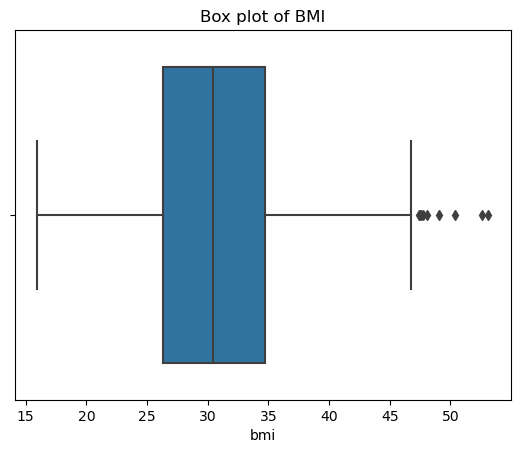

In [18]:
#To know the distribution of bmi we plot the histogram
insurance['bmi'].hist(bins= 30, figsize=(7,5))
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(insurance['bmi'])
plt.title('Box plot of BMI')
plt.show()

C:\Users\VEDANGI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


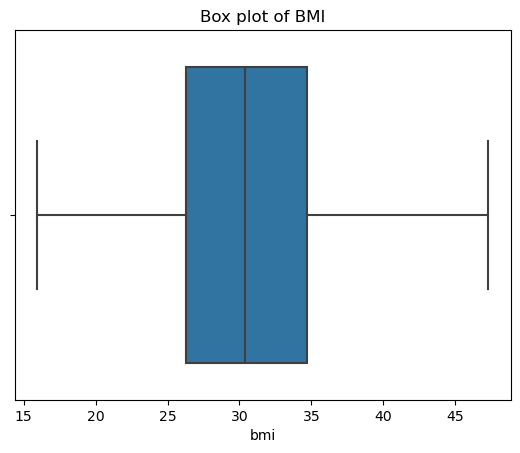

In [19]:
#To remove outlier
Q1 = insurance['bmi'].quantile(0.25)
Q3 = insurance['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

insurance['bmi'] = insurance['bmi'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

sns.boxplot(insurance['bmi'])
plt.title('Box plot of BMI')
plt.show()

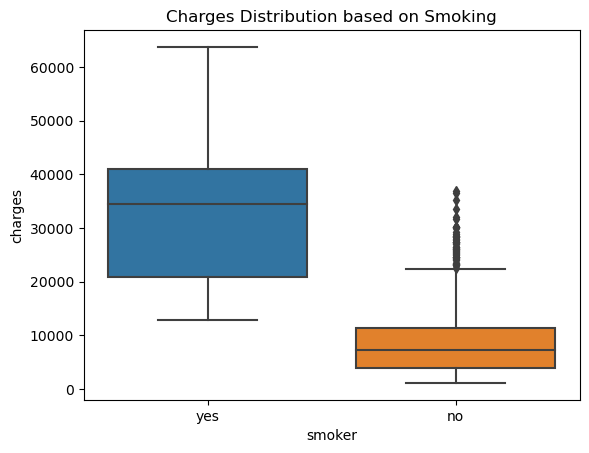

In [20]:
#We can see this relationship at box plot too. There are some outliers like no-smoker but have high charge.
sns.boxplot(x='smoker', y='charges', data=insurance)
plt.title('Charges Distribution based on Smoking')
plt.show()

# smoker == 0 (yani sigara içmeyenler) için charges sütunundaki aykırı değerleri baskılamak:
non_smokers = insurance[insurance['smoker'] == "no"]

Q1 = non_smokers['charges'].quantile(0.25)
Q3 = non_smokers['charges'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


insurance.loc[insurance['smoker'] == "no", 'charges'] = non_smokers['charges'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))


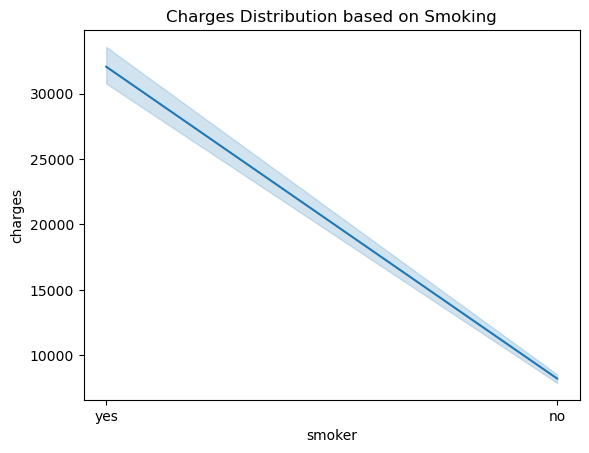

In [21]:
#encode the sex,smoker and region for find corr between the features
labelencoder = LabelEncoder()
insurance['sex_encode'] = labelencoder.fit_transform(insurance['sex'])
insurance['smoker_encode'] = labelencoder.fit_transform(insurance['smoker'])

#We can see it when we look at the line plot: If you are a smoker, than you have high charge.
sns.lineplot(x='smoker', y='charges', data=insurance)
plt.title('Charges Distribution based on Smoking')
plt.show()

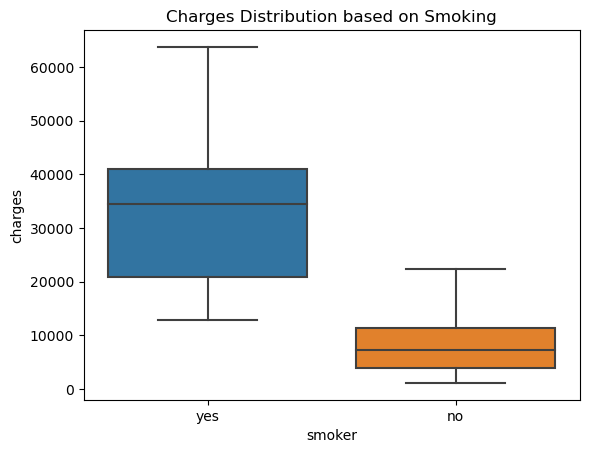

In [22]:
#without outliers
sns.boxplot(x='smoker', y='charges', data=insurance)
plt.title('Charges Distribution based on Smoking')
plt.show()

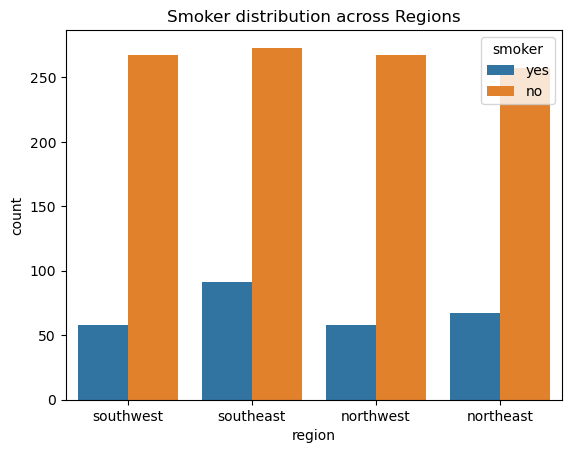

In [23]:
#The number of smokers across regions seems fairly even, with no single region having an exceptionally high or low number of smokers.
sns.countplot(x='region', hue='smoker', data=insurance)
plt.title('Smoker distribution across Regions')
plt.show()

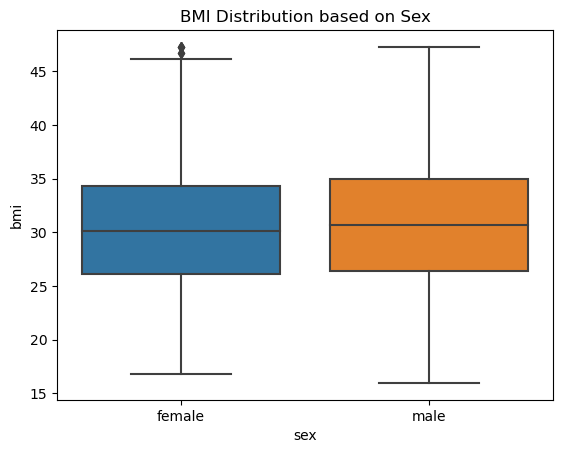

In [24]:
#Both sexes have a similar median BMI. However, the spread of BMI values might be slightly different.
sns.boxplot(x='sex', y='bmi', data=insurance)
plt.title('BMI Distribution based on Sex')
plt.show()

In [25]:
male = insurance[insurance['sex'] == "male"]

Q1 = male['bmi'].quantile(0.25)
Q3 = male['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

insurance.loc[insurance['sex'] == "male", 'bmi'] = male['bmi'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

In [26]:
# Same for the female

female = insurance[insurance['sex'] == "female"]

Q1 = female['bmi'].quantile(0.25)
Q3 = female['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

insurance.loc[insurance['sex'] == "female", 'bmi'] = female['bmi'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

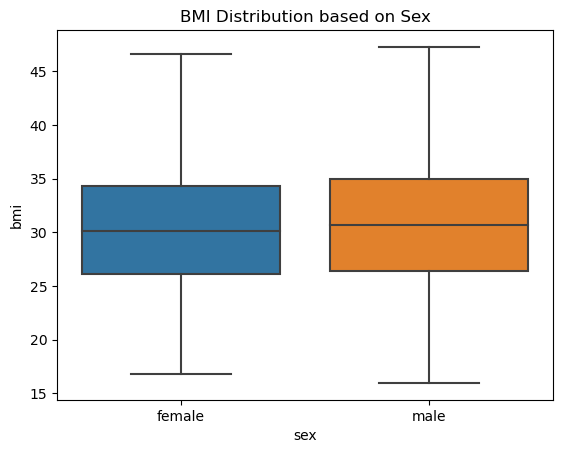

In [27]:
#Both sexes have a similar median BMI. However, the spread of BMI values might be slightly different.
sns.boxplot(x='sex', y='bmi', data=insurance)
plt.title('BMI Distribution based on Sex')
plt.show()

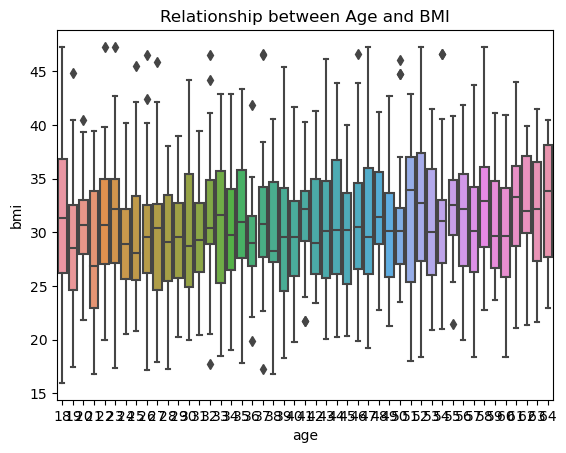

In [28]:
#We can see all bmi distribution for all ages. We can say that some ages have outliers.
#However, age is not necessary for say something about bmi. The correlation is low.
sns.boxplot(x='age', y='bmi', data=insurance)
#sns.set(rc={'figure.figsize':(25,10)})
plt.title('Relationship between Age and BMI')
plt.show()

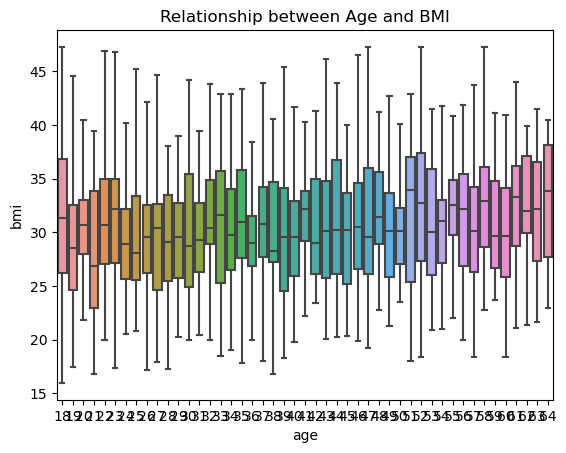

In [29]:
#outlier suppression for ages
unique_ages = insurance['age'].unique()

for age in unique_ages:
    age_subset = insurance[insurance['age'] == age]

    Q1 = age_subset['bmi'].quantile(0.25)
    Q3 = age_subset['bmi'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Aykırı değerlerin var olup olmadığını kontrol edin:
    outliers = age_subset[(age_subset['bmi'] < lower_bound) | (age_subset['bmi'] > upper_bound)]
    
    if not outliers.empty:  # Eğer aykırı değerler varsa:
        insurance.loc[(insurance['age'] == age) & (insurance['bmi'] > upper_bound), 'bmi'] = upper_bound
        insurance.loc[(insurance['age'] == age) & (insurance['bmi'] < lower_bound), 'bmi'] = lower_bound


sns.boxplot(x='age', y='bmi', data=insurance)
plt.title('Relationship between Age and BMI')
plt.show()

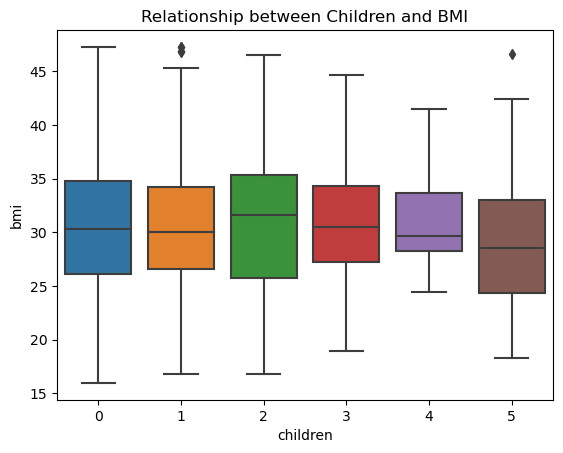

In [30]:
#There is no drastic relationship.
sns.boxplot(x='children', y='bmi', data=insurance)
plt.title('Relationship between Children and BMI')
plt.show()

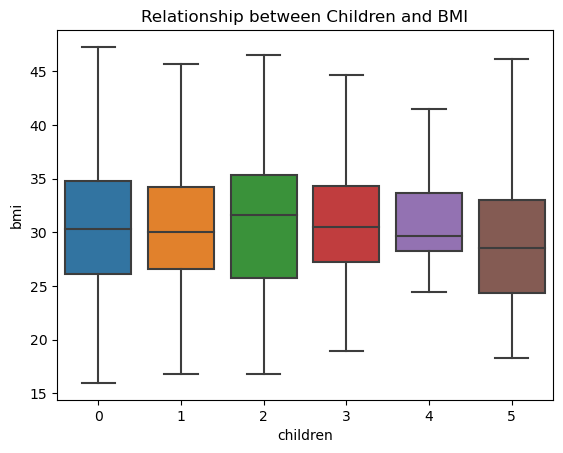

In [31]:
#outlier suppression
unique_childs = insurance['children'].unique()

for child in unique_childs:
    child_subset = insurance[insurance['children'] == child]

    Q1 = child_subset['bmi'].quantile(0.25)
    Q3 = child_subset['bmi'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    
    outliers = child_subset[(child_subset['bmi'] < lower_bound) | (child_subset['bmi'] > upper_bound)]
    
    if not outliers.empty:  
        insurance.loc[(insurance['children'] == child) & (insurance['bmi'] > upper_bound), 'bmi'] = upper_bound
        insurance.loc[(insurance['children'] == child) & (insurance['bmi'] < lower_bound), 'bmi'] = lower_bound


sns.boxplot(x='children', y='bmi', data=insurance)
plt.title('Relationship between Children and BMI')
plt.show()

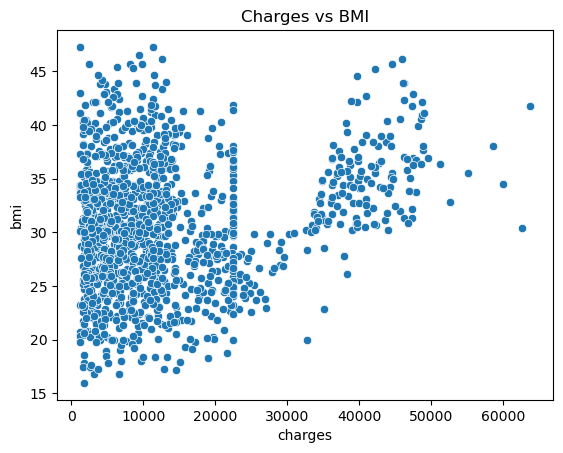

In [32]:
#We can not say anything definite. Because when charges low, there is a crowd.
sns.scatterplot(x='charges', y='bmi', data=insurance)
plt.title('Charges vs BMI')
plt.show()

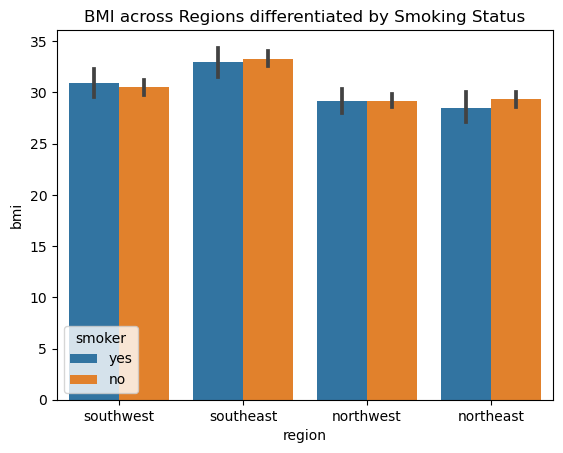

In [33]:
#The the relationship between region, smoker and bmi.
sns.barplot(x='region', y='bmi', hue='smoker', data=insurance)
plt.title('BMI across Regions differentiated by Smoking Status')
plt.show()
#As we can see, almos smokers and non-smokers counts are equal for all regions.

In [34]:
#Region with most children, we have to use group by regions for find sum of children. Than take the maximum value and its region.
region_children = insurance.groupby('region')['children'].sum()
region_with_most_children = region_children.idxmax()
print(f"Region with most children: {region_with_most_children}")

insurance = pd.get_dummies(insurance, columns=['region'], drop_first=True)
insurance

Region with most children: southeast


,age,sex,bmi,children,smoker,charges,region_encode,sex_encode,smoker_encode,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,3,0,1,0,0,1
1,18,male,33.770,1,no,1725.55230,2,1,0,0,1,0
2,28,male,33.000,3,no,4449.46200,2,1,0,0,1,0
3,33,male,22.705,0,no,21984.47061,1,1,0,1,0,0
4,32,male,28.880,0,no,3866.85520,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,1,1,0,1,0,0
1334,18,female,31.920,0,no,2205.98080,0,0,0,0,0,0
1335,18,female,36.850,0,no,1629.83350,2,0,0,0,1,0
1336,21,female,25.800,0,no,2007.94500,3,0,0,0,0,1


0.770999800573442
0.7998213359047545
My charge: 837.4422766100361


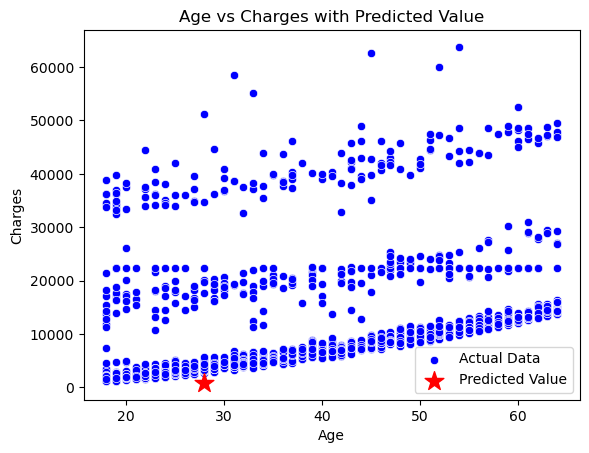

In [35]:
### LINEAR REGRESSION ###

X = insurance[["age", "bmi", "children", "sex_encode",	"smoker_encode", "region_encode"]]
y = insurance["charges"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

# Convert X_train to numpy array if it's a pandas DataFrame. This can be useful when certain algorithms or operations
# expect input data in numpy array format instead of pandas DataFrame.
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.values
# Convert X_test to numpy array if it's a pandas DataFrame. Similar reason as above.
if isinstance(X_test, pd.DataFrame):
    X_test = X_test.values

#Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test

# Create and train the model
lm = LinearRegression()
lm.fit(X_train,y_train)

# Score the model on the train data
print(lm.score(X_train,y_train))

# Score the model on the test data
print(lm.score(X_test,y_test))

my_data = np.array([28, 18.72, 0, 1, 0, 2])

# Reshaping and scaling the data
my_data_reshaped = my_data.reshape(1, -1)
my_data_scaled = scaler.transform(my_data_reshaped)
# Predicting
my_charge_pred = lm.predict(my_data_scaled)
print("My charge: {}".format(my_charge_pred[0]))

sns.scatterplot(x=insurance['age'], y=insurance['charges'], color='blue', label='Actual Data')

age_value_of_my_data = my_data[0]
plt.scatter(age_value_of_my_data, my_charge_pred, color='red', marker='*', s=200, label='Predicted Value')

plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges with Predicted Value')
plt.legend()
plt.show()

0.9775700934579439
0.9776119402985075
My smoker value: 0


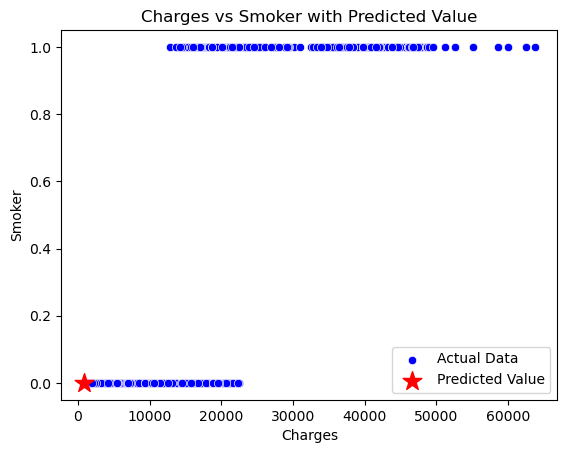

In [36]:
### LOGISTIC REGRESSION ###

X = insurance[["age", "bmi", "children", "sex_encode", "region_encode", "charges"]]
y = insurance["smoker_encode"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

# Convert X_train to numpy array if it's a pandas DataFrame. This can be useful when certain algorithms or operations
# expect input data in numpy array format instead of pandas DataFrame.
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.values
# Convert X_test to numpy array if it's a pandas DataFrame. Similar reason as above.
if isinstance(X_test, pd.DataFrame):
    X_test = X_test.values

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression()

lr.fit(X_train,y_train)

# Score the model on the train data
print(lr.score(X_train,y_train))

# Score the model on the test data
print(lr.score(X_test,y_test))

my_data = np.array([28, 18.72, 0, 1, 2,my_charge_pred[0]])

# Reshaping and scaling the data
my_data_reshaped = my_data.reshape(1, -1)
my_data_scaled = scaler.transform(my_data_reshaped)
# Predicting
pred = lr.predict(my_data_scaled)
print("My smoker value: {}".format(pred[0]))

sns.scatterplot(x=insurance['charges'], y=insurance['smoker_encode'], color='blue', label='Actual Data')

age_value_of_my_data = my_data[5]
plt.scatter(age_value_of_my_data, pred, color='red', marker='*', s=200, label='Predicted Value')

plt.xlabel('Charges')
plt.ylabel('Smoker')
plt.title('Charges vs Smoker with Predicted Value')
plt.legend()
plt.show()

In [37]:
### DECISION TREE ###

X = insurance[["age", "bmi", "children", "sex_encode", "region_encode", "charges"]]
y = insurance["smoker_encode"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DecisionTreeRegressor parameters for GridSearch
param_grid = {
    'max_depth': [None,10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Creating model
tr = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(tr, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# Train it
grid_search.fit(X_train, y_train)

# Best Params
print(grid_search.best_params_)

# Best model
best_tree = grid_search.best_estimator_

# Prediction
y_pred = best_tree.predict(X_test)

#RMSE Calculating
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Squared Error: {mse}")

# DecisionTreeRegressor parameters for RandomizedSearch
param_distributions = {
    'max_depth': [None] + list(np.arange(10, 51, 10)),
    'min_samples_split': np.arange(2, 11, 1),
    'min_samples_leaf': np.arange(1, 5, 1)
}

{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Root Mean Squared Error: 0.13457136670301897
Mean Squared Error: 0.018109452736318407


In [38]:
# RandomizedSearchCV settings
random_search = RandomizedSearchCV(tr, param_distributions, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42, return_train_score=True)

# Train it
random_search.fit(X_train, y_train)

# Best Params
print(random_search.best_params_)

# Best model
best_tree = random_search.best_estimator_

# Prediction
y_pred = best_tree.predict(X_test)

#RMSE Calculating
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Squared Error: {mse}")

{'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None}
Root Mean Squared Error: 0.13457136670301897
Mean Squared Error: 0.018109452736318407


In [39]:
### CROSS VALIDATION (LINEAR - LOGISTIC - DESICION TREE - RANDOM FOREST) ###

X = insurance[["age", "bmi", "children", "sex_encode", "region_encode", "charges"]]
y = insurance["smoker_encode"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

# Convert X_train to numpy array if it's a pandas DataFrame. This can be useful when certain algorithms or operations
# expect input data in numpy array format instead of pandas DataFrame.
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.values
# Convert X_test to numpy array if it's a pandas DataFrame. Similar reason as above.
if isinstance(X_test, pd.DataFrame):
    X_test = X_test.values

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()


In [40]:
from sklearn.model_selection import cross_val_score

models = [lr, dtr, rfr, gbr]
model_names = ["Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting"]

for model, name in zip(models, model_names):
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f"{name} Mean MSE: {-score.mean()}")


from sklearn.metrics import mean_squared_error, mean_absolute_error

# Iterate over models and predict
for model, name in zip(models, model_names):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"\nModel: {name}")
    print(f"\nModel Score: {model.score(X_train,y_train)}")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")

Linear Regression Mean MSE: 0.042526622190696015
Decision Tree Mean MSE: 0.029906542056074764
Random Forest Mean MSE: 0.01645467289719626
Gradient Boosting Mean MSE: 0.019748496197056008

Model: Linear Regression

Model Score: 0.7441781064585252
Mean Squared Error: 0.0377726981136018
Mean Absolute Error: 0.11574108284292883

Model: Decision Tree

Model Score: 1.0
Mean Squared Error: 0.018656716417910446
Mean Absolute Error: 0.018656716417910446

Model: Random Forest

Model Score: 0.9873396684491978
Mean Squared Error: 0.012945895522388062
Mean Absolute Error: 0.023768656716417907

Model: Gradient Boosting

Model Score: 0.9813266103565634
Mean Squared Error: 0.015203789459166136
Mean Absolute Error: 0.03271718003345495


In [ ]:
#Conclusion
###Upon observation, the Random Forest model emerges as a 
#notably successful choice, showcasing impressive outcomes characterized by low Mean Squared Error 
#(MSE) and relatively modest Mean Absolute Error (MAE). The Gradient Boost model also stands out, offering
#competitive performance, particularly in specialized scenarios.

#It's crucial to note that both Random Forest and Gradient Boosting are amalgamated techniques, allowing them to 
#discern intricate patterns within the data. However, when arriving at a final decision, it is advisable to weigh other 
#factors such as computational efficiency, model interpretability, and alignment with specific job requirements.

#To summarize, Random Forest is recognized for its robustness and efficiency in handling complex data,
#while Gradient Boosting excels by iteratively correcting errors, potentially leading to enhanced accuracy. 
#The selection between the two should consider practical aspects like computational time, the need for model 
#interpretability, and the nuances of the task at hand.